In [ ]:
from google.colab import files


diabetes = files.upload()

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
diabetes = pd.read_csv('diabetes_prediction_dataset.csv')

In [ ]:
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
diabetes.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
diabetes.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


Let us see the distribution of diabetic vs non-diabetic patients in this dataset

In [ ]:
diabetes["diabetes"].value_counts(normalize=True)

,proportion
diabetes,
0,0.915
1,0.085


We see that 91.5% of the dataset doesn't have diabetes while 8.5% does have diabetes, creating a imbalanced dataset which we will need to take care of before making any predictions.

In [ ]:
diabetes["gender"].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [ ]:
# drop all rows with gender = other
diabetes = diabetes.drop(diabetes[diabetes['gender'] == 'Other'].index)

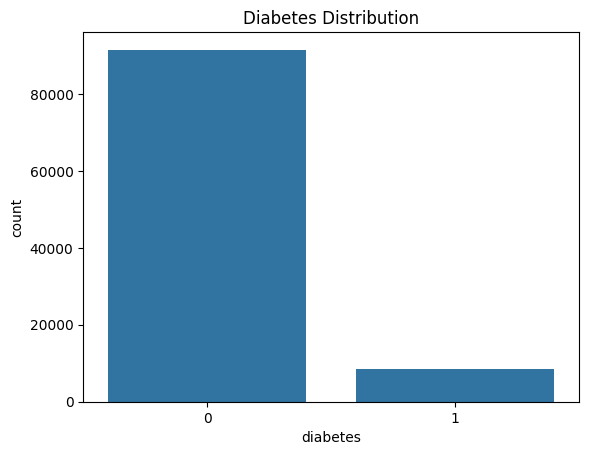

In [ ]:
sns.countplot(x="diabetes", data=diabetes)
plt.title("Diabetes Distribution")
plt.show()

Let us look at the distributions of the other numerical features

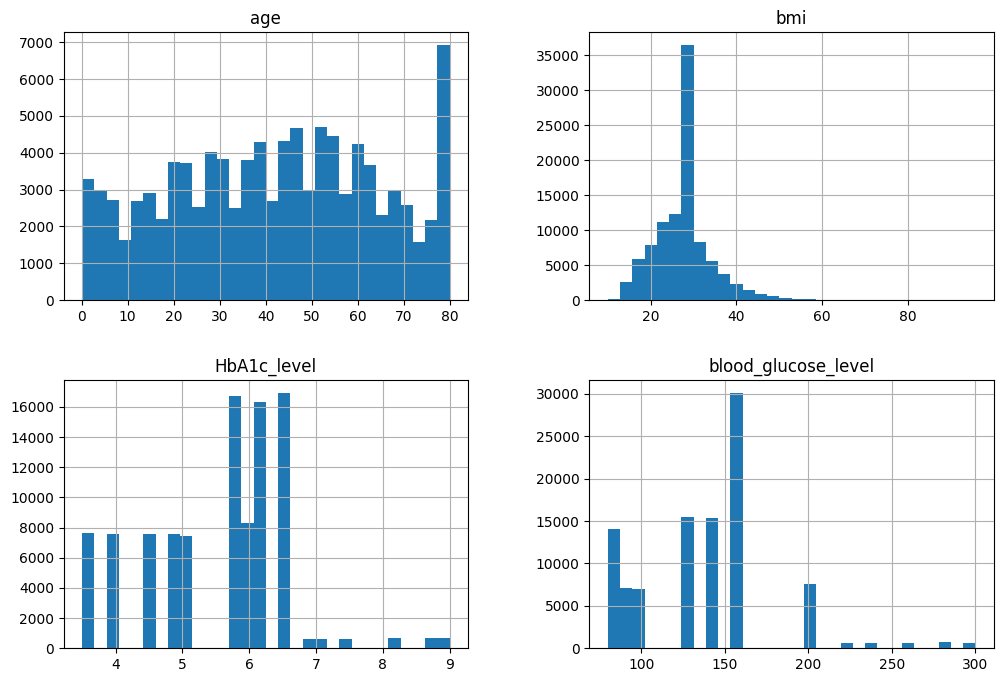

In [ ]:
num_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
diabetes[num_cols].hist(bins=30, figsize=(12,8))
plt.show()


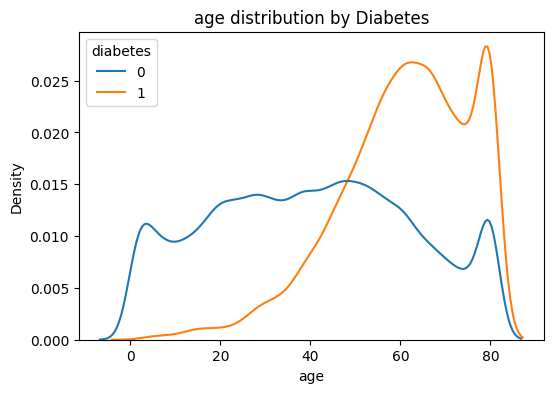

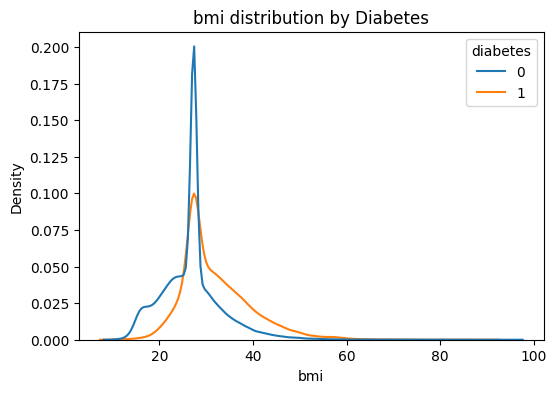

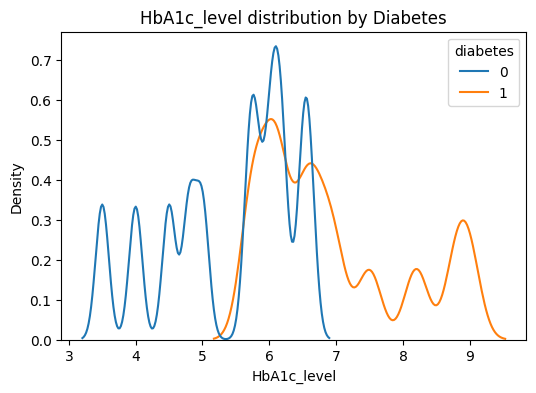

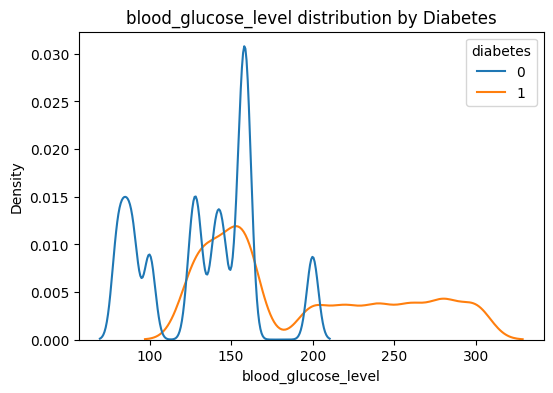

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=diabetes, x=col, hue='diabetes', common_norm=False)
    plt.title(f'{col} distribution by Diabetes')
    plt.show()

Insights on distributions between diabetic and non-diabetic:


1.   We see that as age increases -> count of diabetes increases
2.   We see that for those without diabetes, HbA1c ranges from 3 to 7 but for those with diabetes, it ranges from 5 to 9
3. Looking at blood glucose levels we see that those with diabetes do have higher levels of glucose but its at a low density where those without diabetes dominate the lower range of blood glucose levels hinting at those who might be on the transition to diabetes?



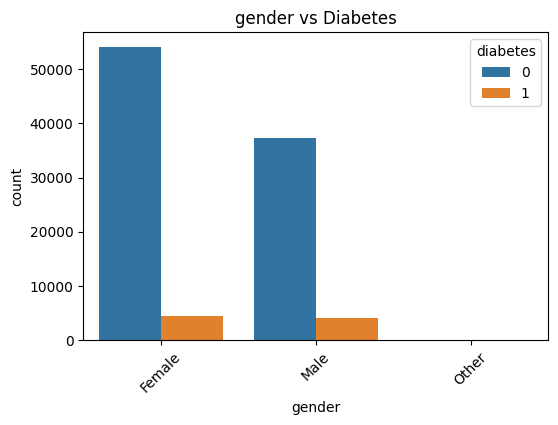

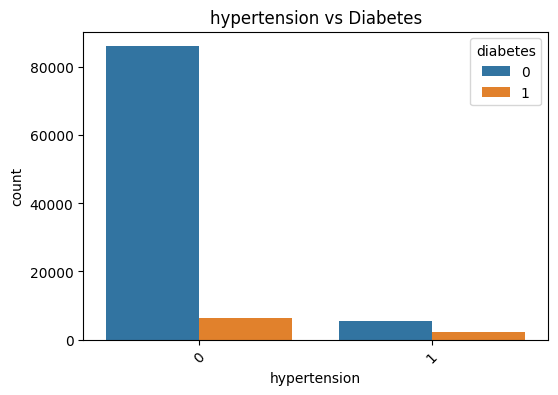

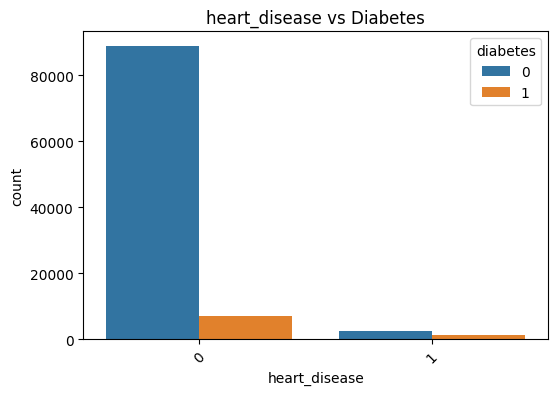

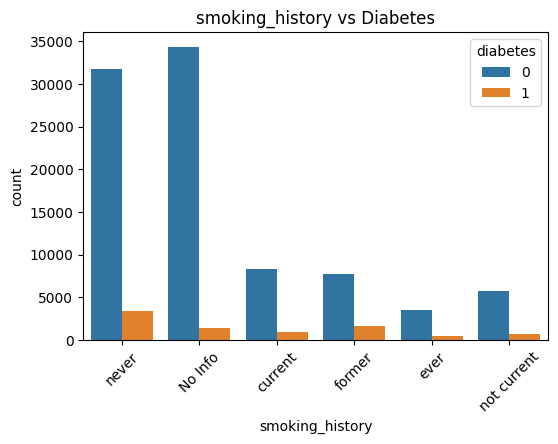

In [ ]:
cat_cols = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='diabetes', data=diabetes)
    plt.title(f'{col} vs Diabetes')
    plt.xticks(rotation=45)
    plt.show()

Observations:


1.  I see that between Male and Female, that the number of diabetic cases are the same indicating that maybe gender has no effect on being diabetic but I will do a hypothesis test
2.   As for hypertension, heart disease and smoking history, I see that most cases are for the lack of them but maybe I will test the small amount of cases of them to see if the proportion of those with the disease,tension or smoking with diabetes is higher than those without the disease/tension/smoking.



In [ ]:
contingency_table = pd.crosstab(diabetes['gender'],diabetes['diabetes'])
print(contingency_table)

diabetes      0     1
gender               
Female    54091  4461
Male      37391  4039


In [ ]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic = {chi2:.4f}")
print(f"p-value = {p:.4f}")

Chi-Square Statistic = 141.2490
p-value = 0.0000


Chi-squared test seems to tell us their is a association between gender and diabetes but let us see which gender has a higher diabetes rate.



In [ ]:
diabetes.groupby("gender")["diabetes"].mean()

,diabetes
gender,
Female,0.076189
Male,0.097490


We see that males are 2% more prone to having diabetes compared to females

I now want to test the other categorical variables to see if having them increases the odds of having diabetes

In [ ]:
# Hypertension vs Diabetes
contingency_table = pd.crosstab(diabetes['hypertension'],diabetes['diabetes'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"p-value: {p}")

Chi2 Statistic: 3909.50978108035
p-value: 0.0


In [ ]:
pd.crosstab(diabetes['hypertension'], diabetes['diabetes'], normalize='index')

diabetes,0,1
hypertension,,
0,0.930679,0.069321
1,0.721042,0.278958


In [ ]:
# Heart Disease vs Diabetes
contingency_table = pd.crosstab(diabetes['heart_disease'],diabetes['diabetes'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"p-value: {p}")

Chi2 Statistic: 2945.00678944634
p-value: 0.0


In [ ]:
pd.crosstab(diabetes['heart_disease'], diabetes['diabetes'], normalize='index')

diabetes,0,1
heart_disease,,
0,0.924688,0.075312
1,0.678590,0.321410


In [ ]:
# Smoking History vs Diabetes
contingency_table = pd.crosstab(diabetes['smoking_history'],diabetes['diabetes'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"p-value: {p}")

Chi2 Statistic: 1955.9388079602643
p-value: 0.0


In [ ]:
pd.crosstab(diabetes['smoking_history'], diabetes['diabetes'], normalize='index')


diabetes,0,1
smoking_history,,
No Info,0.959397,0.040603
current,0.897911,0.102089
ever,0.882088,0.117912
former,0.829983,0.170017
never,0.904651,0.095349
not current,0.892841,0.107159


We see that after performing hypothesis testing and calculating proportions that having hypertension, heart disease or a smoking history has a higher proportion of those with diabetes compared to those without.

Let us perform correlation analysis now

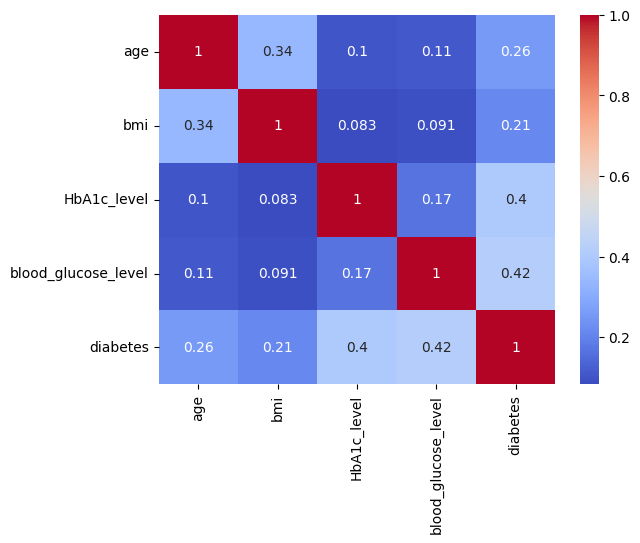

In [ ]:
corr = diabetes[num_cols + ['diabetes']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

We see that HbA1c and blood glucose have a moderately positve correlation with diabetes which makes sense since diabetics both have higher values for these.
We see that HbA1c vs blood glucose have a correlation of 0.17 which means they are related but not strongly so their is no issue of multi-collinearity.
We will probably use both of these variables in our model!